<a href="https://colab.research.google.com/github/erisa03/computer-vision/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

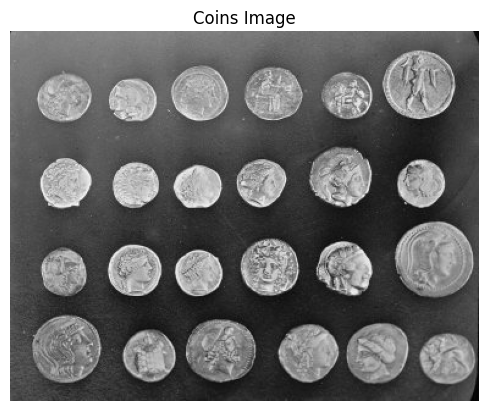

Image shape (height, width): (303, 384)
Minimum pixel value: 1
Maximum pixel value: 252


In [30]:
# Task 1

import matplotlib.pyplot as plt
from skimage import data
import numpy as np

# Load 'coins' image
image = data.coins()

# Display the image
plt.imshow(image, cmap='gray')
plt.title("Coins Image")
plt.axis('off')
plt.show()

# Size of the image
print("Image shape (height, width):", image.shape)

# The range of grayscale pixel values
print("Minimum pixel value:", np.min(image))
print("Maximum pixel value:", np.max(image))


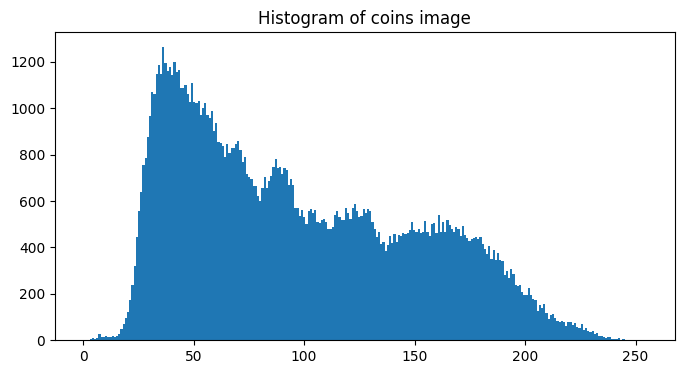

In [32]:
# Task 2

# The histogram of the grayscale image
plt.figure(figsize=(8, 4))
plt.hist(image.ravel(), bins=256, range=(0, 255))
plt.title('Histogram of coins image')
plt.show()


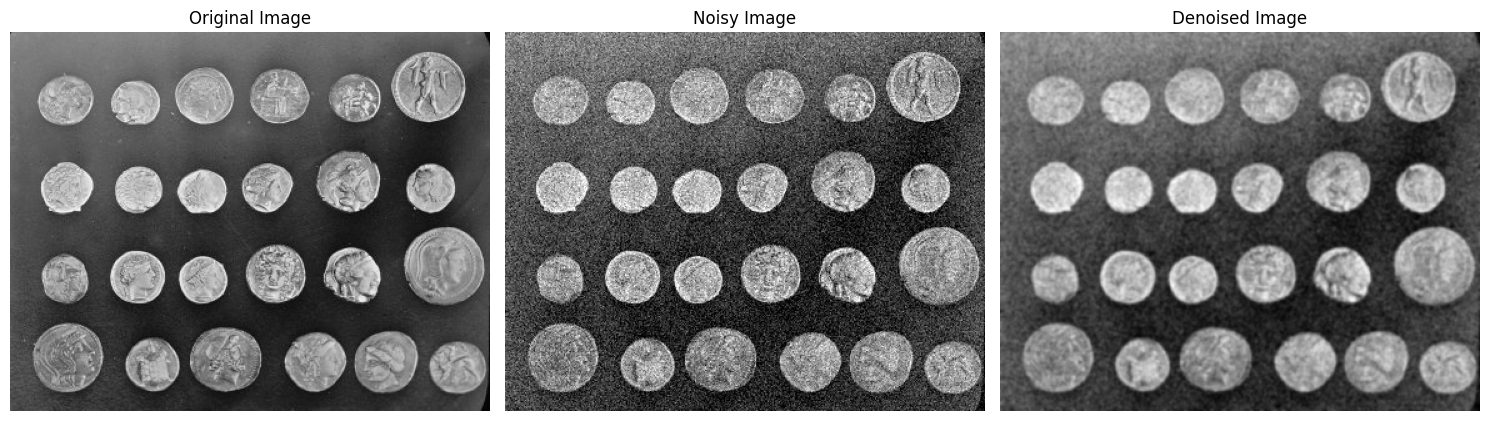

In [48]:
# Task 3

from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.morphology import disk
import matplotlib.pyplot as plt

image = data.coins()

# Add Gaussian noise to the image
noisy_image = random_noise(image, mode='gaussian', var=0.01)

# Denoise using Total Variation filter
denoised_image = gaussian(noisy_image, sigma=1)

# Show the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title("Noisy Image")
ax[1].axis('off')

ax[2].imshow(denoised_image, cmap='gray')
ax[2].set_title("Denoised Image")
ax[2].axis('off')

plt.tight_layout()
plt.show()


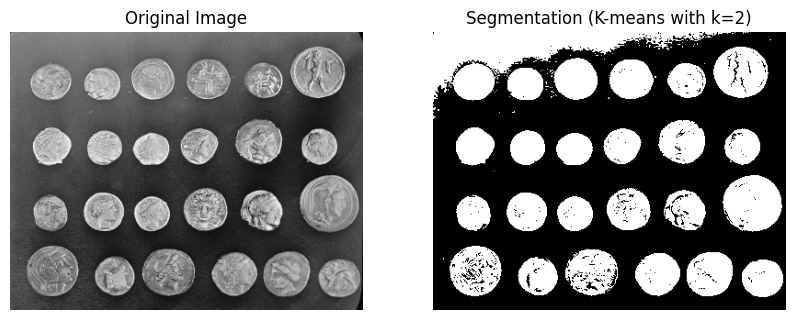

In [35]:
# Task 4

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np
from skimage import data

I = data.coins()
v_I = I.reshape(-1, 1)

n_clus = 2

# K-means model
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

# Predict cluster labels
v_kmeans = kmeans.predict(v_I)

# Reshape the labels back to the image shape
I_kmeans = np.reshape(v_kmeans, (I.shape[0], I.shape[1]))

# Plot using gridspec
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()


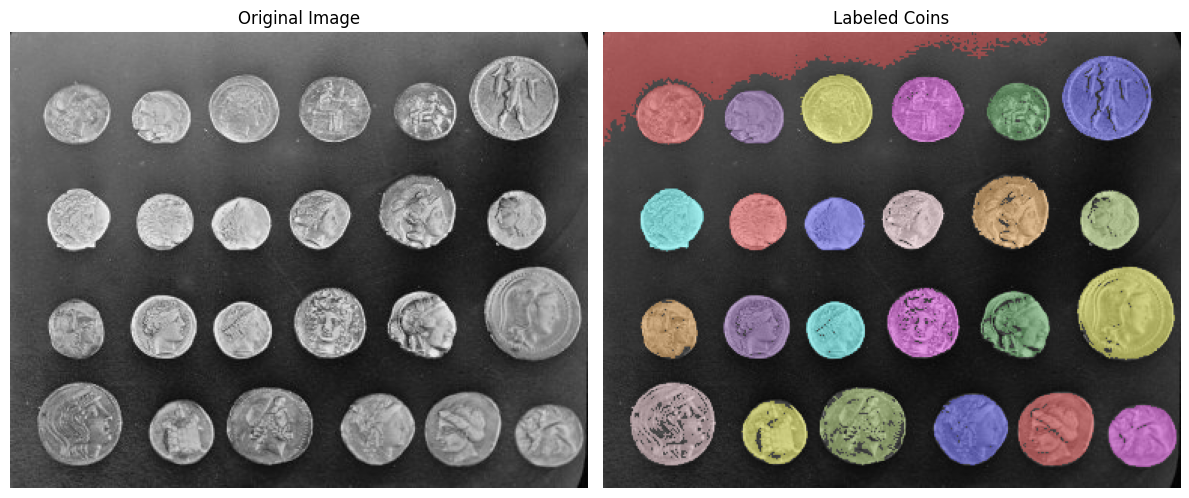

Number of coins detected: 24


In [37]:
# Task 5

from skimage import filters, measure, morphology
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

coins = data.coins()

# Apply a threshold to create a binary image
threshold = filters.threshold_otsu(coins)
binary_coins = coins > threshold

# Remove small objects
cleaned = morphology.remove_small_objects(binary_coins, min_size=50)

# Label connected components
labeled_coins = measure.label(cleaned)

# Count the number of objects (labels > 0)
num_coins = np.max(labeled_coins)

# Visualize the original and labeled images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(coins, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(label2rgb(labeled_coins, image=coins, bg_label=0))
ax[1].set_title('Labeled Coins')
ax[1].axis('off')

plt.tight_layout()
plt.show()

print("Number of coins detected:", num_coins)


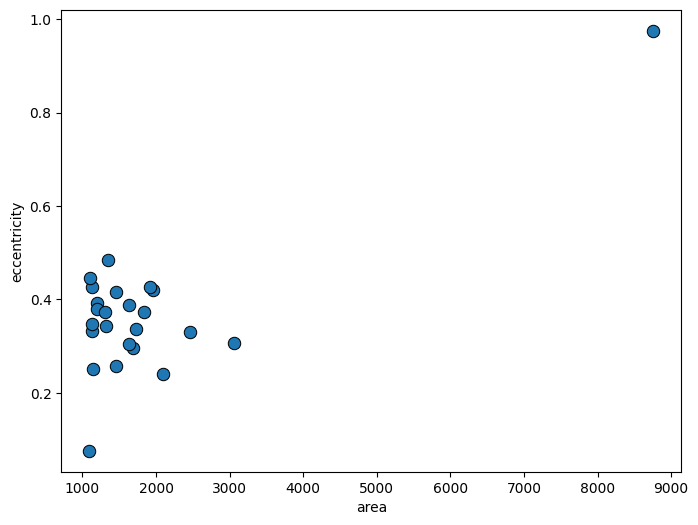

In [39]:
# Task 6

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.measure import regionprops

# Extract region properties from labeled coins
regions = regionprops(labeled_coins)

# Build a DataFrame with the features
df_features = pd.DataFrame({
    'area': [region.area for region in regions],
    'eccentricity': [region.eccentricity for region in regions],
    'major_axis_length': [region.major_axis_length for region in regions],
    'orientation': [region.orientation for region in regions]
})

# Create a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='eccentricity', data=df_features, s=80, edgecolor='black')
plt.show()


In [40]:
# Task 7

# Filter regions with area > 1750 pixels
large_regions = [region for region in regions if region.area > 1750]
num_large_coins = len(large_regions)

# Print the result
print("Number of coins with area > 1750 pixels:", num_large_coins)


Number of coins with area > 1750 pixels: 7


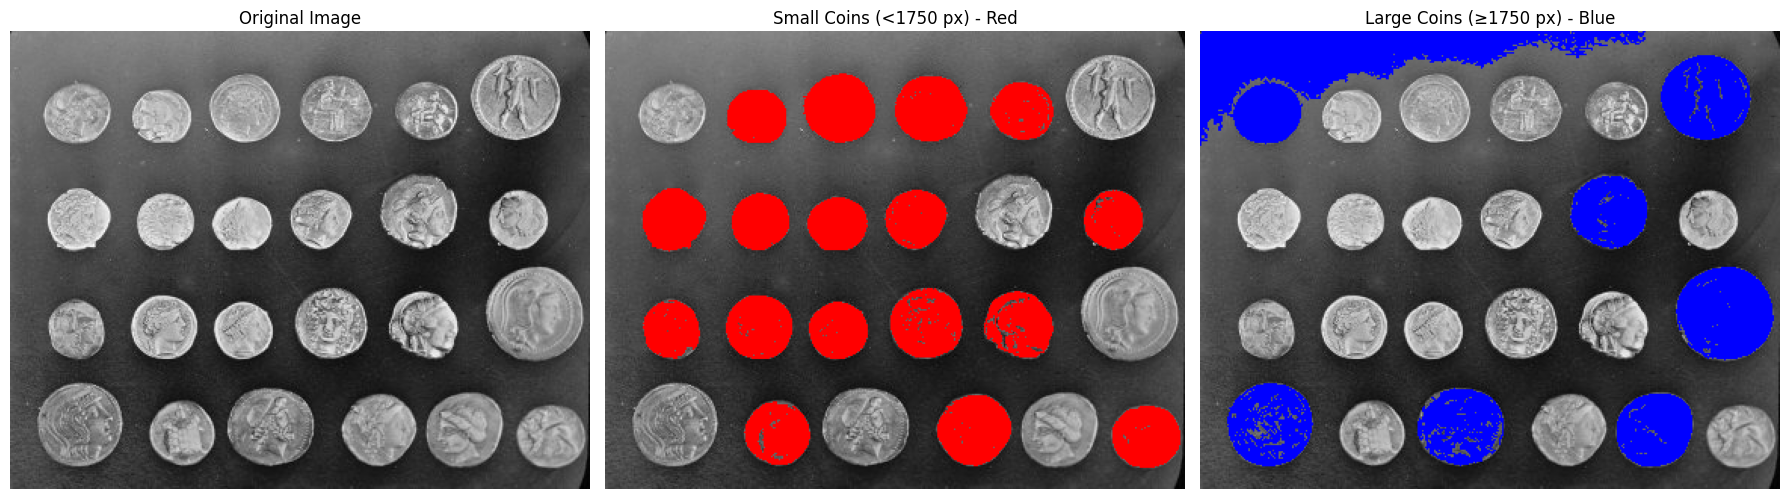

In [41]:
# Task 8

import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, measure, morphology, color

# Load and preprocess the image
coins = data.coins()
threshold = filters.threshold_otsu(coins)
binary_coins = coins > threshold
cleaned = morphology.remove_small_objects(binary_coins, min_size=50)
labeled_coins = measure.label(cleaned)
regions = measure.regionprops(labeled_coins)

# Create masks for small and large coins
small_mask = np.zeros_like(coins, dtype=bool)
large_mask = np.zeros_like(coins, dtype=bool)

for region in regions:
    if region.area < 1750:
        for coord in region.coords:
            small_mask[coord[0], coord[1]] = True
    else:
        for coord in region.coords:
            large_mask[coord[0], coord[1]] = True

# Create RGB overlays
overlay_small = color.gray2rgb(coins).copy()
overlay_small[small_mask] = [255, 0, 0]  # Red for small coins

overlay_large = color.gray2rgb(coins).copy()
overlay_large[large_mask] = [0, 0, 255]  # Blue for large coins

# Display the 3-panel figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ax = axes.ravel()

ax[0].imshow(coins, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(overlay_small)
ax[1].set_title('Small Coins (<1750 px) - Red')
ax[1].axis('off')

ax[2].imshow(overlay_large)
ax[2].set_title('Large Coins (≥1750 px) - Blue')
ax[2].axis('off')

plt.tight_layout()
plt.show()


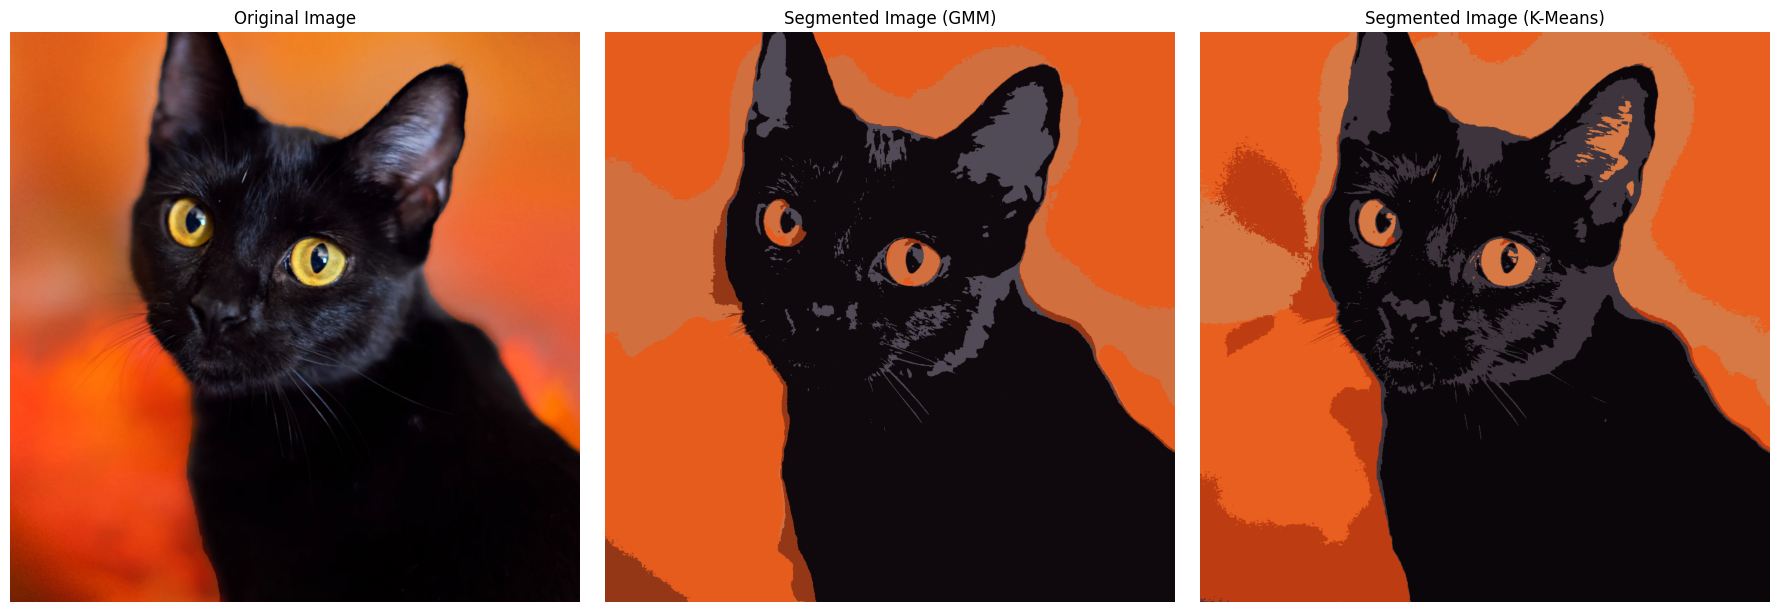

In [44]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

image = io.imread('/content/drive/MyDrive/computer-vision/cats.jpg')
original_shape = image.shape

pixels = image.reshape(-1, 3)

# GMM Segmentation
gmm = GaussianMixture(n_components=5, covariance_type='tied', random_state=0)
gmm.fit(pixels)
labels_gmm = gmm.predict(pixels)
cluster_means_gmm = gmm.means_.astype(int)
segmented_gmm = cluster_means_gmm[labels_gmm].reshape(original_shape)

# K-Means Segmentation
kmeans = KMeans(n_clusters=5, random_state=0)
labels_kmeans = kmeans.fit_predict(pixels)
cluster_means_kmeans = kmeans.cluster_centers_.astype(int)
segmented_kmeans = cluster_means_kmeans[labels_kmeans].reshape(original_shape)

# Results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segmented_gmm)
axes[1].set_title('Segmented Image (GMM)')
axes[1].axis('off')

axes[2].imshow(segmented_kmeans)
axes[2].set_title('Segmented Image (K-Means)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

When segmenting the cat image, GMM produces smoother and more natural regions by modeling color variations with flexible Gaussian clusters. This helps capture subtle shading in the fur and background better.

K-Means, creates sharper but more blocky segments, sometimes breaking smooth areas into smaller, less coherent regions (the ears and eyes).

Although K-Means runs faster, GMM offers higher quality segmentation that respects the colors and textures in the image.

In [43]:
# Task 10

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data, filters, measure, img_as_ubyte
from skimage.feature.texture import graycomatrix, graycoprops
from skimage.morphology import closing, disk

image = data.coins()

# Threshold image to segment coins
thresh = filters.threshold_otsu(image)
binary = closing(image > thresh, disk(3))

# Label connected components (coins)
label_image = measure.label(binary)

# Extract region properties
props = measure.regionprops(label_image, intensity_image=image)

nregions = len(props)
props_texture = np.zeros((nregions, 5))  # contrast, dissimilarity, homogeneity, energy, correlation

for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    region_intensity = image[minr:maxr, minc:maxc]

    # Convert region image to uint8
    region_uint8 = img_as_ubyte(region_intensity)

    # Compute GLCM
    g = graycomatrix(region_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    # Texture features
    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]

# DataFrame with texture features and region labels
df_features = pd.DataFrame(props_texture, columns=[
    'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'
])
df_features.insert(0, 'Region Label', range(1, nregions + 1))
df_features = df_features.round(4)

# Display the DataFrame
print(df_features)

    Region Label   Contrast  Dissimilarity  Homogeneity  Energy  Correlation
0              1   286.2418         8.1194       0.3017  0.0318       0.8871
1              2    29.3333         4.6667       0.1835  0.2887      -0.4708
2              3     0.0000         0.0000       0.0000  0.0000       1.0000
3              4    25.0000         5.0000       0.0385  0.7071      -1.0000
4              5     0.0000         0.0000       0.0000  0.0000       1.0000
5              6     0.0000         0.0000       0.0000  0.0000       1.0000
6              7     0.0000         0.0000       0.0000  0.0000       1.0000
7              8   995.5266        21.3214       0.0869  0.0173       0.7657
8              9     0.0000         0.0000       0.0000  0.0000       1.0000
9             10     0.0000         0.0000       0.0000  0.0000       1.0000
10            11   549.1065        15.9586       0.0981  0.0205       0.8100
11            12     9.0000         3.0000       0.1000  0.7071      -1.0000